In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../2023_Data_Mining_Brain_cancer_Dataset/dataset/Brain_GSE50161.csv')
#df.describe()

In [3]:
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


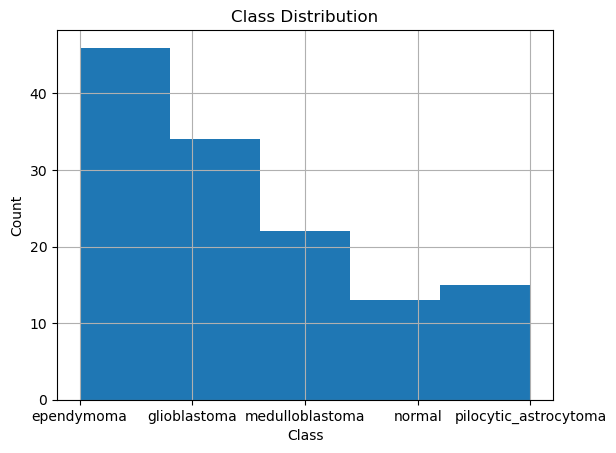

In [4]:
# Plot a histogram of the class distribution
df['type'].hist(bins=len(df['type'].unique()))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [5]:
X = df.drop(['samples','type'], axis=1)
y = df['type']
X.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [6]:
pca = PCA()
scaler = StandardScaler()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=22,stratify=y)
scaler.fit(X_train)
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

In [38]:
pca.fit(X_train_standard)
X_train_pca = pca.fit_transform(X_train_standard)
X_test_pca = pca.transform(X_test_standard)
X_test_pca.shape

(39, 91)

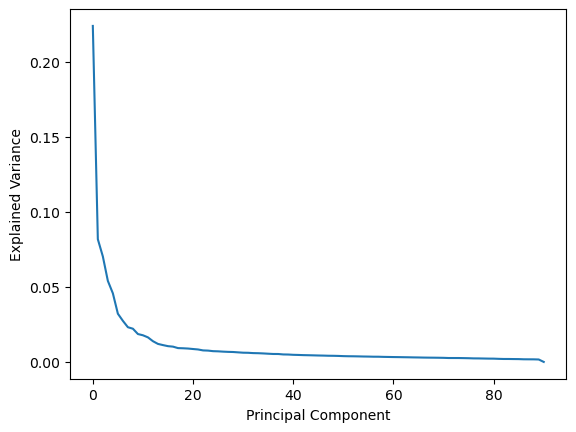

In [39]:
import numpy as np
explained_variance = pca.explained_variance_ratio_

# Print the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
#print(cumulative_variance)

# Plot the explained variance
import matplotlib.pyplot as plt
plt.plot(explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [40]:
pca.components_.shape

(91, 54675)

In [41]:
pca_names = [f'pca_{i}' for i in range(cumulative_variance.shape[0])]

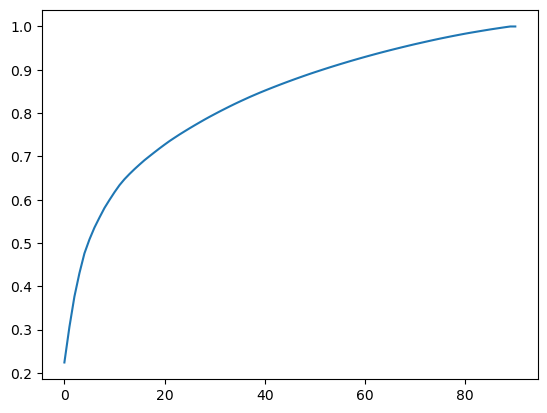

In [42]:
plt.plot(cumulative_variance)

In [43]:
cumulative_variance.shape

(91,)

In [44]:
pca.components_

array([[ 2.46816146e-03, -4.12758029e-03,  2.75399006e-04, ...,
        -4.12796512e-03, -4.42466732e-03, -1.00726070e-03],
       [-1.19500383e-02,  6.88166818e-04, -6.76819193e-03, ...,
         3.03041768e-04,  2.01208692e-03,  2.01815599e-03],
       [-5.98161003e-04, -8.29159104e-03, -1.15341277e-03, ...,
         2.99947539e-03, -1.61039846e-03,  3.05385824e-03],
       ...,
       [-5.24686350e-04, -1.46739302e-03, -5.61941546e-03, ...,
         9.59080610e-04,  3.84141991e-03,  9.97734752e-04],
       [-1.17015199e-03,  2.20495508e-03, -1.74607364e-03, ...,
         5.09964864e-03, -3.66784396e-03, -5.76711093e-03],
       [ 6.77097590e-02,  8.22200779e-02, -8.86506908e-02, ...,
         8.42832316e-05, -5.61145476e-04,  1.17455329e-04]])

In [45]:
df_pca = pd.DataFrame(X_train_pca, columns = pca_names)

In [46]:
df_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_81,pca_82,pca_83,pca_84,pca_85,pca_86,pca_87,pca_88,pca_89,pca_90
0,-108.863372,33.281632,-16.519670,-32.816633,-51.262364,9.932149,-0.742666,47.755133,0.920845,-59.687803,...,3.751896,-0.333425,-3.018177,1.178806,2.673881,1.641520,-0.190442,-0.097580,-0.935218,1.286045e-13
1,-86.198464,17.989635,134.389071,-5.042540,-32.281877,-37.633221,21.399038,29.046323,52.603048,91.057990,...,2.089970,0.832188,-5.312006,1.128729,-1.229945,1.211597,1.326085,-2.310808,4.231171,1.286045e-13
2,-46.058483,-69.863354,-55.673260,-12.204830,0.215651,126.962834,28.715291,18.108756,19.143384,-15.499345,...,0.549460,-0.230223,0.128951,-3.416370,0.379011,0.596991,-1.761485,1.371789,-2.414999,1.286045e-13
3,-38.874502,-43.939790,27.425965,104.029081,-36.971366,-36.669023,-59.577061,-3.830610,42.910194,-13.904441,...,-5.931964,16.865035,6.166422,4.085057,-0.414443,5.553471,6.488889,-3.631826,-2.672875,1.286045e-13
4,70.581726,-25.825102,7.769188,-94.408461,9.359775,3.007644,10.620661,35.986765,-40.088099,4.968900,...,16.599333,6.143820,2.741116,3.045862,4.857178,-5.067105,-4.608778,1.539484,-15.626144,1.286045e-13


In [47]:
X_train_pca.shape

(91, 91)

In [48]:
X.shape

(130, 54675)

In [49]:
pca.n_components_

91

In [50]:
pca.explained_variance_ratio_.shape

(91,)

In [51]:
#X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size = 0.3, random_state=22,stratify=y)

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca.astype('float'),y_train)

In [53]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'ependymoma': 32, 'glioblastoma': 24, 'medulloblastoma': 15, 'pilocytic_astrocytoma': 11, 'normal': 9})
After SMOTE : Counter({'glioblastoma': 32, 'normal': 32, 'ependymoma': 32, 'pilocytic_astrocytoma': 32, 'medulloblastoma': 32})


In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
model = KNeighborsClassifier()
model.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [56]:
y_predict = model.predict(X_test_pca)
X_test_pca.shape

(39, 91)

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import  f1_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.7948717948717948


col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,12,1,0,0,1
glioblastoma,0,5,0,0,5
medulloblastoma,0,0,7,0,0
normal,0,0,0,4,0
pilocytic_astrocytoma,1,0,0,0,3


In [58]:
model2 = KNeighborsClassifier()

In [59]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test_pca)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.7948717948717948


col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,12,1,0,0,1
glioblastoma,0,5,0,0,5
medulloblastoma,0,0,7,0,0
normal,0,0,0,4,0
pilocytic_astrocytoma,1,0,0,0,3


In [31]:
#X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3,random_state=10,stratify=y)

In [62]:
model3 = KNeighborsClassifier()
model.fit(X_train_pca,y_train)
y_predict = model.predict(X_test_pca)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)
X_train_standard.shape

0.7948717948717948


(91, 54675)

In [63]:
from sklearn.tree import DecisionTreeClassifier,export_text
#X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size = 0.3, random_state=22,stratify=y)

In [74]:
model = DecisionTreeClassifier()

In [75]:
model.fit(X_train_smote,y_train_smote)
print(X_train_smote.shape,X_test_pca.shape)

(160, 91) (39, 91)


In [76]:
y_predict = model.predict(X_test_pca)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.7435897435897436


col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,11,1,0,0,2
glioblastoma,0,5,2,0,3
medulloblastoma,0,0,7,0,0
normal,0,1,0,3,0
pilocytic_astrocytoma,1,0,0,0,3


In [79]:
from sklearn.svm import SVC

In [80]:
linear_model = SVC(kernel='linear')

In [151]:
linear_model.fit(X_train_standard,y_train)
y_predict = linear_model.predict(X_test_standard)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)


0.9487179487179487


array(['glioblastoma', 'normal', 'ependymoma', 'pilocytic_astrocytoma',
       'medulloblastoma'], dtype=object)

In [176]:
from matplotlib.lines import Line2D
colmap = {'ependymoma' : 'red',
        'glioblastoma' : 'green',
        'medulloblastoma' : 'blue',
        'pilocytic_astrocytoma' : 'yellow',
        'normal' : 'pink'
        }
c = [ colmap[i] for i in y_train ]
col_to_class = {v: k for k, v in colmap.items()}
col_to_class
custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='yellow', lw=4),
                Line2D([0], [0], color='pink', lw=4)]
names = ['ependymoma','glioblastoma','medulloblastoma','pilocytic_astrocytoma','normal']

In [177]:
#pca_df = pd.DataFrame(X_pca,columns=pca_names)
df_pca['pca_0']
pd.unique(y_train)

array(['glioblastoma', 'normal', 'ependymoma', 'pilocytic_astrocytoma',
       'medulloblastoma'], dtype=object)

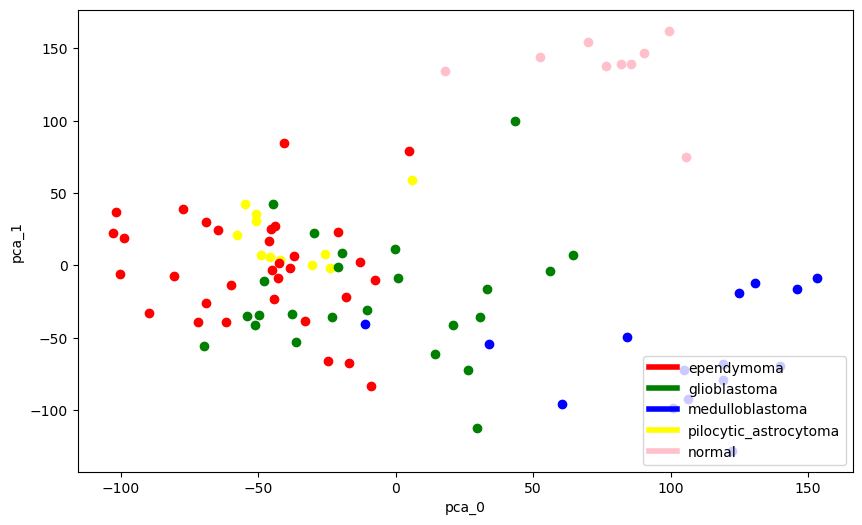

In [186]:
plt.figure(figsize=(10, 6)) 
plt.xlabel('pca_0')
plt.ylabel('pca_1')
for i in range(len(y_train)):
    plt.scatter(df_pca['pca_1'][i], df_pca['pca_2'][i], c = c[i])
plt.legend(custom_lines,names, loc = 'lower right')

 

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size = 0.3, random_state=22,stratify=y)
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)
model = GaussianNB()
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_predict,y_test))

0.5384615384615384


In [44]:
pd.crosstab(y_test,y_predict)

col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,9,4,0,0,1
glioblastoma,2,8,0,0,0
medulloblastoma,0,5,2,0,0
normal,0,2,1,1,0
pilocytic_astrocytoma,2,1,0,0,1


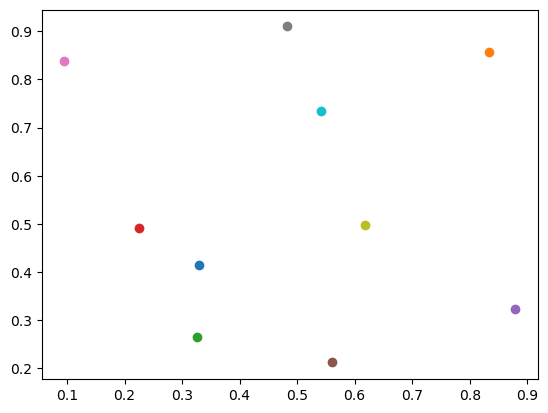

array([2.24054502e-01, 8.18270644e-02, 7.03460608e-02, 5.40413725e-02,
       4.57457345e-02, 3.21465286e-02, 2.73916835e-02, 2.31443138e-02,
       2.21447998e-02, 1.85967214e-02, 1.77693963e-02, 1.63765925e-02,
       1.38161751e-02, 1.20135444e-02, 1.12233068e-02, 1.05118707e-02,
       1.01899931e-02, 9.21780045e-03, 9.10209798e-03, 8.92324332e-03,
       8.60431585e-03, 8.30875806e-03, 7.68147665e-03, 7.54698175e-03,
       7.17505386e-03, 7.06474929e-03, 6.85646081e-03, 6.70491439e-03,
       6.61583527e-03, 6.37973563e-03, 6.14970241e-03, 6.08919672e-03,
       5.88502248e-03, 5.81613878e-03, 5.66503255e-03, 5.47177233e-03,
       5.30126496e-03, 5.28011298e-03, 4.99346532e-03, 4.93109709e-03,
       4.74136352e-03, 4.65444451e-03, 4.53375797e-03, 4.46478935e-03,
       4.38042005e-03, 4.28597057e-03, 4.22000990e-03, 4.11824276e-03,
       4.08212572e-03, 3.99856552e-03, 3.86442978e-03, 3.78884006e-03,
       3.75565391e-03, 3.69279020e-03, 3.60870260e-03, 3.56150651e-03,
      